<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day4/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data exploration

Let's explore the following dataset. The data is fetched from this [datahub](https://datahub.io/core/co2-ppm) website. 

The main source of the data is the US goverment Earth system research lab. The data consists of the time series of the number of CO2 molcules in the air devided by the total number of molcules expressed in units of part per million (ppm).

In [0]:
!wget --no-check-certificate \
   https://datahub.io/core/co2-ppm/r/co2-ppm_zip.zip \
    -O /tmp/ice

--2019-12-05 02:22:35--  https://datahub.io/core/co2-ppm/r/co2-ppm_zip.zip
Resolving datahub.io (datahub.io)... 104.24.113.103, 104.24.112.103, 2606:4700:30::6818:7167, ...
Connecting to datahub.io (datahub.io)|104.24.113.103|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/core/co2-ppm/co2-ppm_zip/data/679e32c15532f0630eee658fd485975a/co2-ppm_zip.zip [following]
--2019-12-05 02:22:36--  https://pkgstore.datahub.io/core/co2-ppm/co2-ppm_zip/data/679e32c15532f0630eee658fd485975a/co2-ppm_zip.zip
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.24.113.103, 104.24.112.103, 2606:4700:30::6818:7167, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.24.113.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56735 (55K) [application/zip]
Saving to: ‘/tmp/ice’

/tmp/ice            100%[===================>]  55.41K  --.-KB/s    in 0.09s   

2019-12-05 02:22:37 (612 KB/s) - ‘/tmp/ice’ saved

In [0]:
import pandas as pd
import os
import zipfile

zip_ref = zipfile.ZipFile('/tmp/ice', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import numpy as np

In [0]:
df = pd.read_csv("/tmp/data/co2-mm-mlo_csv.csv")

In [0]:
df.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [0]:
#The missing values are indicated by -99.99. Let's replaced them by NaN
df[df.columns] = df[df.columns].replace(-99.99, np.NaN)


In [0]:
df.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,NaN,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


Note that now the missing values are shown with NaN. 
The panda library offers different ways to handle missing values.
For instance, one can use the `fillna` attribute of panda dataframe to fill the gaps.

For more insight into how panda does this, take a look at the Panda documentation: [Missing values in Panda](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [0]:
#ffill will fill in the gap by forwarding the value in the back to the missing entry. 
df = df.fillna(method = 'ffill')

Note that the date-time format of the Date column is actually supported by a Numpy data type: ```datetime64```. 

Now we turn the Date column into the index of the Panda dataframe such that the new dataframe can be treated as a time-series.

The following lines will drop the Data column and will make it the index.

In [0]:
datetime_series = pd.to_datetime(df['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
df_new = df.set_index(datetime_index)
df_new.drop('Date',axis=1, inplace=True)

In [0]:
#Now let's look at the new dataframe with date as an index
df_new.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,317.50,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


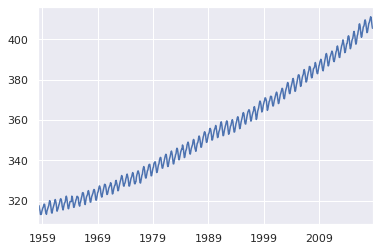

In [0]:
#By default this is going to show the dates as the x axis
avg = df_new['Average']
avg.plot()

Now let's look at the rolling mean of the data

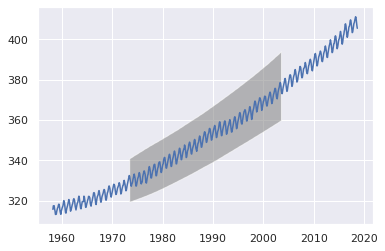

In [0]:
#We can compute the rolling average of the time series over some specified window
rolling = avg.rolling(365, center= True)
rolling_mean = rolling.mean()
rolling_std = rolling.std()
plt.plot(avg.index.values, avg.values)
plt.fill_between(avg.index.values, rolling_mean-rolling_std, rolling_mean+rolling_std,
                facecolor='C7', alpha=0.6)


Text(0, 0.5, 'Residual')

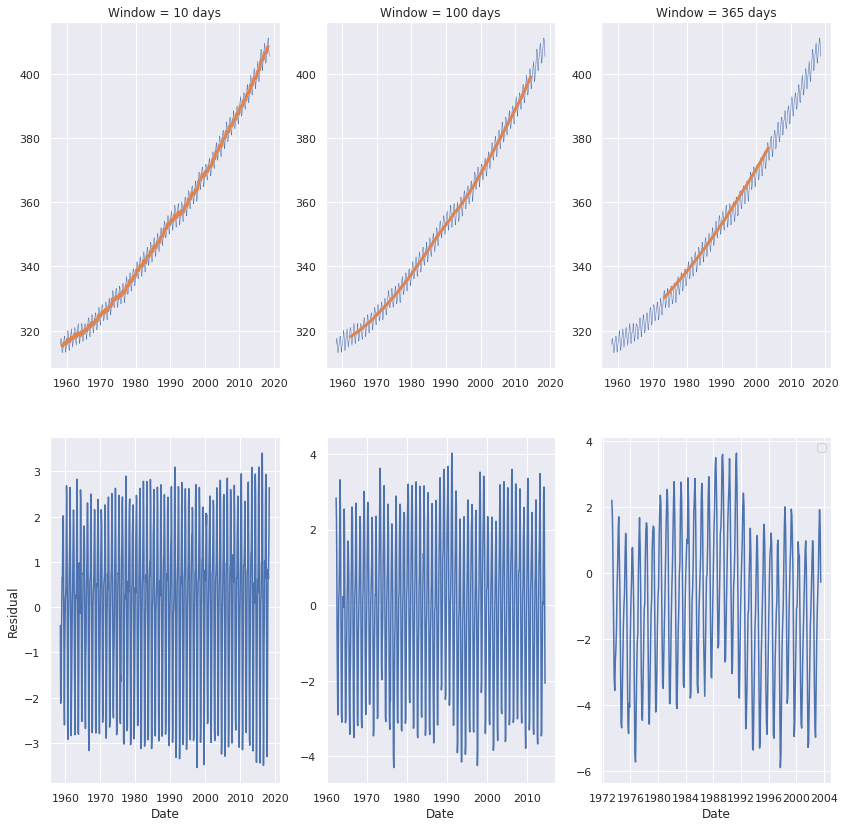

In [0]:
windows = [10, 100, 365]
means = []
for window in windows:
  rolling = avg.rolling(window, center=True)
  rolling_mean = rolling.mean()
  means.append(rolling_mean)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 14))
for i in range(3):
  ax[0,i].plot(avg.index.values, avg.values, lw = 0.5 , label = "signal")
  ax[0,i].plot(avg.index.values, means[i], lw = 3, label = "rolling average")
  ax[1,i].plot(avg.index.values, avg.values - means[i])
  ax[1,i].set_xlabel("Date")
  ax[0,i].set_title("Window = "+str(windows[i])+" days")
plt.legend()  
ax[1,0].set_ylabel("Residual")  

In [0]:
from fbprophet import Prophet


In [0]:
#Make a dat frame with the past values
mask_past = np.where(avg.index.values < np.array('2015-01-01', dtype=np.datetime64))[0]
df_past = pd.DataFrame({'ds': avg.index.values[mask_past], 'y': avg.values[mask_past]})

In [0]:
df_past.head()

,ds,y
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.50
4,1958-07-01,315.86


In [0]:
model = Prophet()
model.fit(df_past)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods = 1460)
future.tail()

,ds
2137,2018-11-26
2138,2018-11-27
2139,2018-11-28
2140,2018-11-29
2141,2018-11-30


In [0]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2137,2018-11-26,405.990815,404.620965,407.386028
2138,2018-11-27,406.089112,404.793440,407.402381
2139,2018-11-28,406.187247,404.759646,407.630375
2140,2018-11-29,406.284456,404.895565,407.719316
2141,2018-11-30,406.380075,404.991931,407.792977


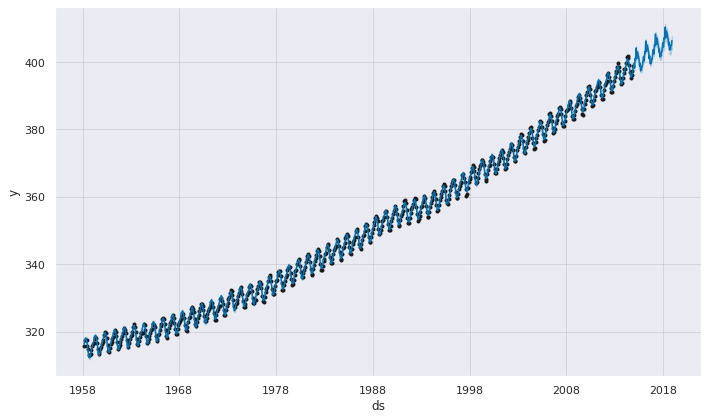

In [0]:
forecast_figure = model.plot(forecast)

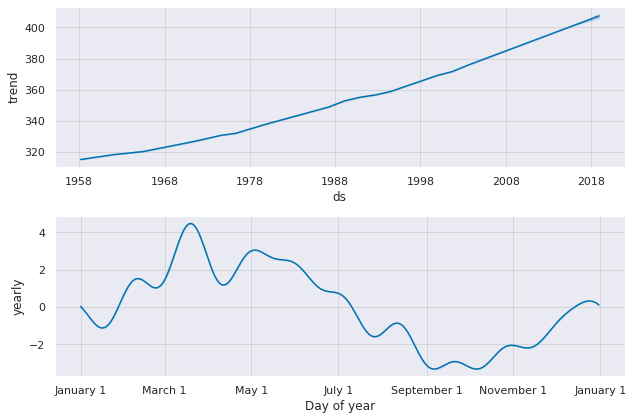

In [0]:
component_figure = model.plot_components(forecast)

#Seasonality and trend

From the figures shown above you can get an idea of this time-series can 
be decomposed into two main components: A yearly ***seasonal*** pattern + an ***upward trend***. 

According to the facebook prophet model ([documentation](https://https://facebook.github.io/prophet/)), the pattern seen in the data consists of an upward growing trend in addition to some seasonal oscilations.

#Exercise

Repeat the same exploratory data analysis for the following dataset.
This dataset consists of the closing stock prices of google that you can load into your code using Panda.

Follow the next lines of code and then repeat the exercises we did with the CO2 data.

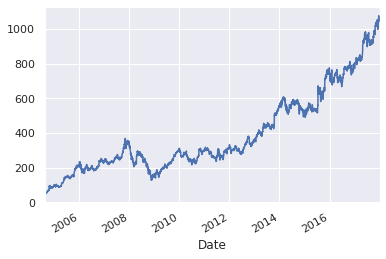

In [99]:
from pandas_datareader import data

google = data.DataReader('GOOG', start='2000', end='2018',
                       data_source='yahoo')
google.head()

price = google['Close']
price.plot()
#We fill in the missing values with the backward filling method
#the backward filling method will assign the next available future value to the missing value
price = price.fillna(method = 'bfill')